In [91]:
import requests
import os
import datetime
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from dotenv import load_dotenv
from panel.interact import interact
import numpy as np
%matplotlib inline

In [3]:
zip_list=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473,11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237,10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040 ,11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378, 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [4]:
bronx=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473]

brooklyn=[11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237]

manhattan=[ 10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040]

queens=[11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378]

staten_island=[ 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [55]:
nyc_sale_path=Path("data/NYC_data.csv")
colnames = ["sno","Zip Code", "Date", "Num of Units Sold", "Average Sales", "Median Sales"]

nyc_sale_df=pd.read_csv(nyc_sale_path, names=colnames, header=None)
nyc_sale_df.drop(columns=['sno','Num of Units Sold','Median Sales'],inplace=True)
for i in range (len(nyc_sale_df)):
    nyc_sale_df.iloc[i,0]=nyc_sale_df.iloc[i,0][2:]
nyc_sale_df['Borough']=pd.Series()
for i in range(len(nyc_sale_df)):
    if int(nyc_sale_df.iloc[i,0]) in bronx:
        nyc_sale_df.iloc[i,3]='Bronx'
    elif int(nyc_sale_df.iloc[i,0]) in brooklyn:
        nyc_sale_df.iloc[i,3]='Brooklyn'
    elif int(nyc_sale_df.iloc[i,0]) in manhattan:
        nyc_sale_df.iloc[i,3]='Manhattan'
    elif int(nyc_sale_df.iloc[i,0]) in queens:
         nyc_sale_df.iloc[i,3]='Queens'
    elif int(nyc_sale_df.iloc[i,0]) in staten_island:
         nyc_sale_df.iloc[i,3]='Staten Island'
nyc_sale_df['Date']=pd.to_datetime(nyc_sale_df['Date'])
nyc_sale_df.sort_values(by='Date',inplace=True) 
nyc_sale_df

,Zip Code,Date,Average Sales,Borough
0,11212,2015-01-01,1551110,Brooklyn
6185,10065,2015-01-01,3879289,Manhattan
6245,10075,2015-01-01,1901133,Manhattan
6305,10128,2015-01-01,1711459,Manhattan
6365,10023,2015-01-01,2407835,Manhattan
6425,10024,2015-01-01,2064279,Manhattan
6485,10025,2015-01-01,926705,Manhattan
6082,10028,2015-01-01,1276041,Manhattan
480,11204,2015-01-01,768153,Brooklyn
6614,10032,2015-01-01,534986,Manhattan


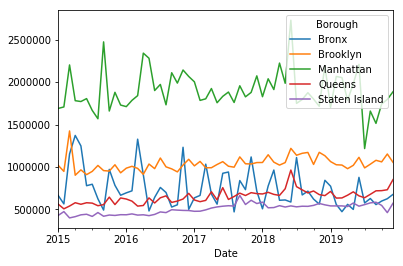

In [56]:
avg_sale_price_per_borough=nyc_sale_df.drop(columns='Zip Code')

avg_sale_price_per_borough=avg_sale_price_per_borough.pivot_table(index='Date',columns='Borough',values='Average Sales')
avg_sale_price_per_borough.plot()

In [57]:
def plot_avg_sale_price_per_borough (borough):
    return(avg_sale_price_per_borough[borough].hvplot.line( rot=90,
                                                               label=f'Avg Sale Price In {borough}',
                                                               xlabel='Date',
                                                               ylabel="Price"
    ))
list_of_boroughs=['Manhattan','Bronx','Brooklyn','Queens','Staten Island']
interact(plot_avg_sale_price_per_borough,borough=list_of_boroughs)

Column
    [0] Column
        [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
    [1] Row
        [0] HoloViews(Curve, name='interactive129139')

In [58]:

borough_sale_df=nyc_sale_df.drop(columns='Borough')

borough_sale_df=borough_sale_df.pivot_table(index='Date',columns='Zip Code',values='Average Sales')
def plot_sale_price_per_borough(borough):
   
    return(borough_sale_df.hvplot.line(label=f'Sale Price per Zip Code in {borough}',rot=90,ylabel='Price',xlabel='Date',figsize=(20,20)))
list_of_boroughs=['Manhattan','Bronx','Brooklyn','Queens','Staten Island']
interact(plot_sale_price_per_borough,borough=list_of_boroughs)

Column
    [0] Column
        [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
    [1] Row
        [0] HoloViews(NdOverlay, name='interactive129306')

In [68]:
#Avg dale prices by quarter for borough
avg_sale_df=nyc_sale_df.drop(columns='Zip Code')
avg_sale_df=avg_sale_df.pivot_table(index='Date',columns='Borough',values='Average Sales')

list_quarters=[]

for i in range(0,len(avg_sale_df),3):
    list_quarters.append(avg_sale_df.iloc[i:i+3].mean().to_list())
index=['2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1']

quarter_sale_df=pd.DataFrame(list_quarters,columns=('Bronx','Brooklyn','Manhattan','Queens','Staten Island'),index=('2015-Q1','2015-Q2','2015-Q3','2015-Q4','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q1','2017-Q2','2017-Q3','2017-Q4','2018-Q1','2018-Q2','2018-Q3','2018-Q4','2019-Q1','2019-Q2','2019-Q3','2019-Q4'))
quarter_sale_df

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
2015-Q1,7.936697e+05,1.130284e+06,1.866549e+06,535577.169492,433772.444444
2015-Q2,1.132875e+06,9.258300e+05,1.785913e+06,572124.844243,430735.111111
2015-Q3,6.372525e+05,9.741481e+05,1.902829e+06,557428.864407,432843.194444
2015-Q4,8.069360e+05,9.692575e+05,1.756214e+06,611727.891974,432944.777778
2016-Q1,9.134569e+05,9.920667e+05,1.778926e+06,585771.847458,438420.027778
2016-Q2,6.769483e+05,9.757775e+05,2.174441e+06,585371.355932,434230.083333
2016-Q3,6.614433e+05,1.027944e+06,1.938502e+06,625813.118644,475787.055556
2016-Q4,7.621143e+05,1.018279e+06,2.065984e+06,636082.739529,488450.833333
2017-Q1,7.776927e+05,1.022893e+06,1.863706e+06,602400.525424,483276.166667
2017-Q2,7.223921e+05,1.027422e+06,1.837731e+06,691745.971751,527237.555556


In [109]:
monthly_returns=avg_sale_price_per_borough.pct_change()
avg_mothly_return_bronx=monthly_returns.mean()['Bronx']
avg_mothly_return_brooklyn=monthly_returns.mean()['Brooklyn']
avg_mothly_return_manhattan=monthly_returns.mean()['Manhattan']
avg_mothly_return_queens=monthly_returns.mean()['Queens']
avg_mothly_return_staten_island=monthly_returns.mean()['Staten Island']

In [110]:
std_bronx=monthly_returns.std()['Bronx']
std_brooklyn=monthly_returns.std()['Brooklyn']
std_manhattan=monthly_returns.std()['Manhattan']
std_queens=monthly_returns.std()['Queens']
std_staten_island=monthly_returns.std()['Staten Island']

In [111]:
last_month_price_bronx=avg_sale_price_per_borough.iloc[-1][0]
last_month_price_brooklyn=avg_sale_price_per_borough.iloc[-1][1]
last_month_price_manhattan=avg_sale_price_per_borough.iloc[-1][2]
last_month_price_queens=avg_sale_price_per_borough.iloc[-1][3]
last_month_price_staten_island=avg_sale_price_per_borough.iloc[-1][4]

In [112]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 12 * 5
monte_carlo_manhattan=pd.DataFrame()
monte_carlo_bronx=pd.DataFrame()
monte_carlo_brooklyn=pd.DataFrame()
monte_carlo_staten_island=pd.DataFrame()
monte_carlo_queens=pd.DataFrame()
simulated_price_df = pd.DataFrame()

In [113]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    simulation_prices_bronx=[last_month_price_bronx]
    simulation_prices_brooklyn=[last_month_price_brooklyn]
    simulation_prices_manhattan=[last_month_price_manhattan]
    simulation_prices_queens=[last_month_price_queens]
    simulation_prices_staten_island=[last_month_price_staten_island]
    for i in range(number_records):  
         price_bronx= simulation_prices_bronx[-1] * (1 + np.random.normal(avg_mothly_return_bronx,std_bronx))
         price_brooklyn= simulation_prices_brooklyn[-1] * (1 + np.random.normal(avg_mothly_return_brooklyn,std_brooklyn))
         price_manhattan= simulation_prices_manhattan[-1] * (1 + np.random.normal(avg_mothly_return_manhattan,std_manhattan))
         price_queens= simulation_prices_queens[-1] * (1 + np.random.normal(avg_mothly_return_queens,std_queens))
         price_staten_island= simulation_prices_staten_island[-1] * (1 + np.random.normal(avg_mothly_return_staten_island,std_staten_island))
         
         simulation_prices_bronx.append(price_bronx)
         simulation_prices_brooklyn.append(price_brooklyn)
         simulation_prices_manhattan.append(price_manhattan)
         simulation_prices_queens.append(price_queens)
         simulation_prices_staten_island.append(price_staten_island)
         
   

    simulated_price_df['Bronx']=pd.Series(simulation_prices_bronx)
    simulated_price_df['Manhattan']=pd.Series(simulation_prices_manhattan)
    simulated_price_df['Brooklyn']=pd.Series(simulation_prices_brooklyn)
    simulated_price_df['Queens']=pd.Series(simulation_prices_queens)
    simulated_price_df['Staten Island']=pd.Series(simulation_prices_staten_island)
    
    
    
    
    # Calculate the daily returns of simulated prices
    simulated_monthly_returns_manhattan=simulated_price_df['Manhattan'].pct_change()
    simulated_monthly_returns_bronx=simulated_price_df['Bronx'].pct_change()
    simulated_monthly_returns_brooklyn=simulated_price_df['Brooklyn'].pct_change()
    simulated_monthly_returns_queens=simulated_price_df['Queens'].pct_change()
    simulated_monthly_returns_staten_island=simulated_price_df['Staten Island'].pct_change()
        
 

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    
    # Calculate the normalized, cumulative return series
    monte_carlo_bronx[x]=(1+simulated_monthly_returns_bronx.fillna(0)).cumprod()
    monte_carlo_manhattan[x]=(1+simulated_monthly_returns_manhattan.fillna(0)).cumprod()
    monte_carlo_brooklyn[x]=(1+simulated_monthly_returns_brooklyn.fillna(0)).cumprod()
    monte_carlo_queens[x]=(1+simulated_monthly_returns_queens.fillna(0)).cumprod()
    monte_carlo_staten_island[x]=(1+simulated_monthly_returns_staten_island.fillna(0)).cumprod()

# Print records from the DataFrame



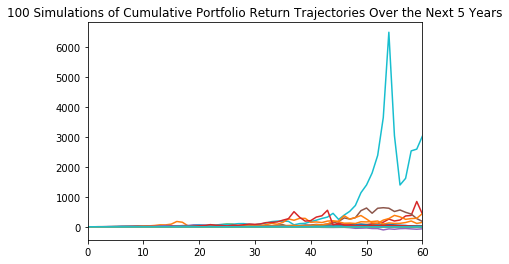

In [114]:
monte_carlo_bronx.plot(legend=None, title=plot_title)

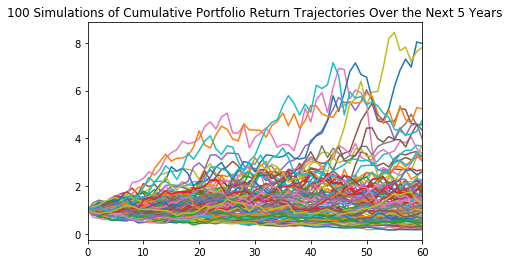

In [115]:

monte_carlo_brooklyn.plot(legend=None, title=plot_title)

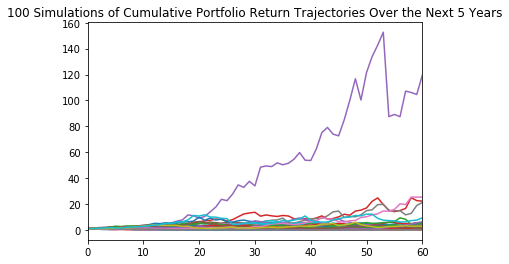

In [116]:
monte_carlo_manhattan.plot(legend=None, title=plot_title)

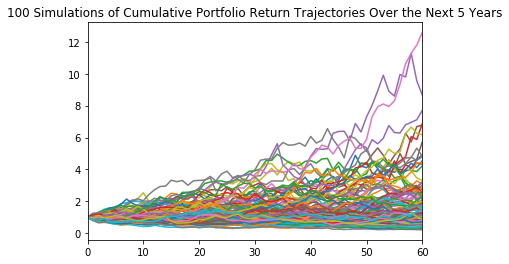

In [117]:
monte_carlo_queens.plot(legend=None, title=plot_title)

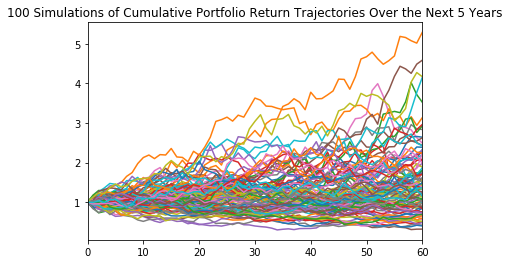

In [118]:
monte_carlo_staten_island.plot(legend=None, title=plot_title)